#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# identifying path
path = '/Users/Ana/Documents/Instacart Basket Analysis'

In [3]:
#executing path
path

'/Users/Ana/Documents/Instacart Basket Analysis'

#### Importing Data

In [4]:
# Importing latest dataset with low activity customers
df_opan = pd.read_pickle(os.path.join(path, '02 Data', 'orders_products_customers_profiled.pkl'))

In [5]:
df_opan.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,number_of_dependents,marital_status,income,region,activity,age_group_flag,income_flag,household_size_flag,child_age_flag,pets_flag
1513,520620,120,prior,1,3,11,NaN,196,2,0,...,2,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets
1514,3273029,120,prior,3,2,8,19.0,196,2,1,...,2,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets
1515,520620,120,prior,1,3,11,NaN,46149,1,0,...,2,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets
1516,3273029,120,prior,3,2,8,19.0,46149,1,1,...,2,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets
1517,520620,120,prior,1,3,11,NaN,26348,3,0,...,2,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets


In [6]:
# Importing department
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'departments_wrangled.csv'))

In [7]:
#check
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# Renaming Unnamed: 0 to department_id
df_dep.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [9]:
#check
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


6. Create an appropriate visualization to show the distribution of profiles.

In [10]:
# getting variable names
df_opan.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_since_prior_order', 'order_frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'region',
       'activity', 'age_group_flag', 'income_flag', 'household_size_flag',
       'child_age_flag', 'pets_flag'],
      dtype='object')

#### Department profile

In [11]:
# create department profile

dept_profile = []

for value in df_opan['department_id']:
    if value == 1:
        dept_profile.append('Frozen')
    elif value == 2:
        dept_profile.append('Other')
    elif value == 3:
        dept_profile.append('Bakery')
    elif value == 4:
        dept_profile.append('Produce')
    elif value == 5:
        dept_profile.append('Alcohol')
    elif value == 6:
        dept_profile.append('International')
    elif value == 7:
        dept_profile.append('Beverages')
    elif value == 8:
        dept_profile.append('Pets')
    elif value == 9:
        dept_profile.append('Dry goods pasta')
    elif value == 10:
        dept_profile.append('Bulk')
    elif value == 11:
        dept_profile.append('Personal care')
    elif value == 12:
        dept_profile.append('Meat seafood')
    elif value == 13:
        dept_profile.append('Pantry')
    elif value == 14:
        dept_profile.append('Breakfast')
    elif value == 15:
        dept_profile.append('Canned goods')
    elif value == 16:
        dept_profile.append('Dairy eggs')
    elif value == 17:
        dept_profile.append('Household')
    elif value == 18:
        dept_profile.append('Babies')
    elif value == 19:
        dept_profile.append('Snacks')
    elif value == 20:
        dept_profile.append('Deli')
    elif value == 21:
        dept_profile.append('Missing')

In [12]:
#create new column
df_opan['dept_name'] = dept_profile

In [13]:
#checking output
df_opan.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,marital_status,income,region,activity,age_group_flag,income_flag,household_size_flag,child_age_flag,pets_flag,dept_name
1513,520620,120,prior,1,3,11,NaN,196,2,0,...,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets,Beverages
1514,3273029,120,prior,3,2,8,19.0,196,2,1,...,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets,Beverages
1515,520620,120,prior,1,3,11,NaN,46149,1,0,...,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets,Beverages
1516,3273029,120,prior,3,2,8,19.0,46149,1,1,...,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets,Beverages
1517,520620,120,prior,1,3,11,NaN,26348,3,0,...,married,99219,South,low,Old-Aged adult,Middle income,NaN,Older children,No Pets,Snacks


In [14]:
#checking frequency
df_opan['dept_name'].value_counts()

dept_name
Produce            400015
Dairy eggs         222188
Snacks             121144
Beverages          116225
Frozen             113090
Pantry              92674
Canned goods        55984
Bakery              51761
Deli                47415
Dry goods pasta     44491
Household           38808
Meat seafood        34146
Breakfast           32552
Personal care       23276
Babies              13410
International       13262
Alcohol              9069
Pets                 4659
Missing              4377
Other                1880
Bulk                 1122
Name: count, dtype: int64

In [47]:
#aggregating expenditures by dept_name
df_opan.groupby('dept_name').agg({'prices':['mean', 'min', 'max']})

prices              
                      mean  min      max
dept_name                               
Alcohol           8.032109  1.0     15.0
Babies            7.760194  1.0     15.0
Bakery            7.783439  1.0     15.0
Beverages         7.635206  1.0     15.0
Breakfast         8.011649  1.0     14.9
Bulk              8.409804  1.4     14.1
Canned goods      7.419147  1.0     15.0
Dairy eggs       41.929116  1.0  99999.0
Deli              7.680348  1.0     15.0
Dry goods pasta   7.367157  1.0     15.0
Frozen            7.794145  1.0     15.0
Household         7.458274  1.0     15.0
International     7.749193  1.0     15.0
Meat seafood     16.183942  8.0     25.0
Missing           8.661618  1.0     15.0
Other             7.520638  1.1     14.9
Pantry            7.912959  1.0     20.0
Personal care     7.960921  1.0     15.0
Pets              7.925113  1.0     15.0
Produce           8.012559  1.0     15.0
Snacks            4.272747  1.6      7.0

In [48]:
#aggregating order frequency by dept_name
df_opan.groupby('dept_name').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dept_name                                        
Alcohol                      17.712347  0.0  30.0
Babies                       19.121253  0.0  30.0
Bakery                       19.497518  0.0  30.0
Beverages                    19.416675  0.0  30.0
Breakfast                    19.492141  0.0  30.0
Bulk                         18.910319  0.0  30.0
Canned goods                 19.781869  0.0  30.0
Dairy eggs                   19.621846  0.0  30.0
Deli                         19.644968  0.0  30.0
Dry goods pasta              19.943985  0.0  30.0
Frozen                       19.631750  0.0  30.0
Household                    20.277136  0.0  30.0
International                19.662351  0.0  30.0
Meat seafood                 19.524584  0.0  30.0
Missing                      16.557593  0.0  30.0
Other                        18.854398  0.0  30.0
Pantry                       19.535955  0.0  30.0
Personal care                19.744389  0.0  30.0
Pets                         19.185962  0.0  30.0
Produce                      19.341269  0.0  30.0
Snacks                       19.370790  0.0  30.0

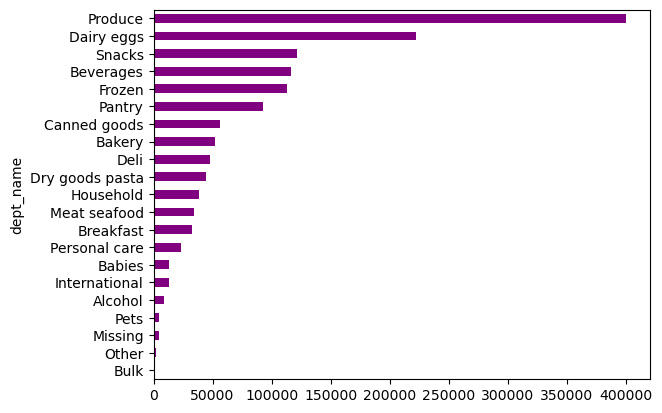

In [49]:
#bar chart for dept frequency
dept_bar=df_opan['dept_name'].value_counts().sort_values().plot.barh(color = 'purple')

In [50]:
# Export Bar Chart

dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_bar.png'))

### Age group

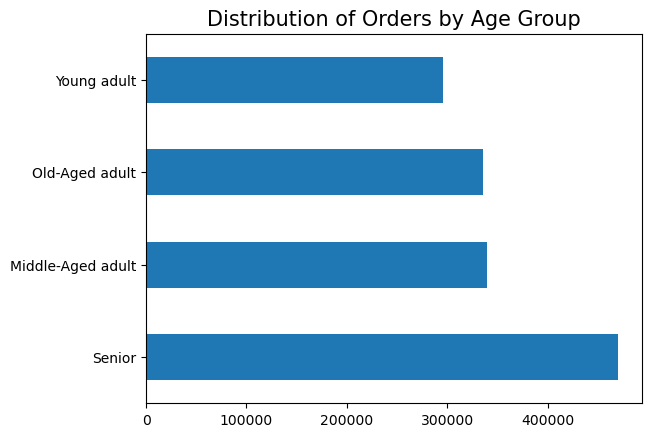

In [51]:
# creating bar chart for age group
bar_age_group = df_opan['age_group_flag'].value_counts().plot.barh()
plt.ylabel('')
plt.title('Distribution of Orders by Age Group',fontsize=15)
plt.savefig('bar_distrib_by_age.png', bbox_inches='tight')

In [52]:
# Export Bar Chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

### Income 

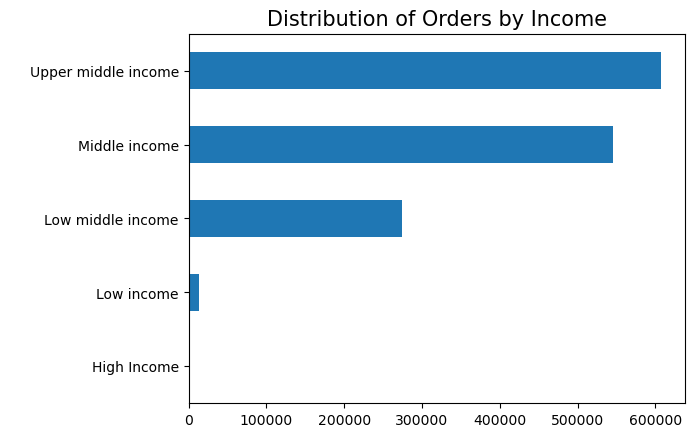

In [53]:
# creating bar chart for income
bar_income = df_opan['income_flag'].value_counts().sort_index().plot.barh()
plt.ylabel(' ')
plt.title('Distribution of Orders by Income',fontsize=15)
plt.savefig('bar_distrib_by_income_flag.png', bbox_inches='tight')

In [54]:
# Export Bar Chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

### Child age

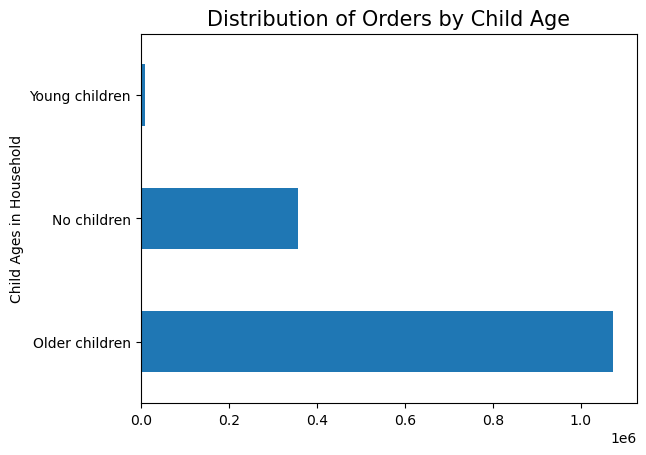

In [55]:
# creating bar chart for age group
bar_child_age = df_opan['child_age_flag'].value_counts().plot.barh()
plt.ylabel('Child Ages in Household')
plt.title('Distribution of Orders by Child Age',fontsize=15)
plt.savefig('bar_distrib_by_child_age.png', bbox_inches='tight')

In [56]:
# Export Bar Chart
bar_child_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_child_age.png'))

### Pets

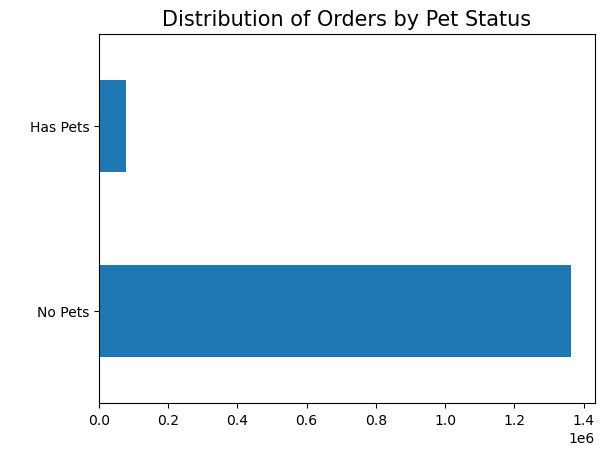

In [57]:
# creating bar chart for pet status
bar_pets = df_opan['pets_flag'].value_counts().plot.barh()
plt.ylabel(' ')
plt.title('Distribution of Orders by Pet Status',fontsize=15)
plt.savefig('bar_distrib_by_pet_status.png', bbox_inches='tight')

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Age group

In [58]:
# usage frequency per age group
df_opan.groupby('age_group_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                    mean  min   max
age_group_flag                                     
Middle-Aged adult              19.577454  0.0  30.0
Old-Aged adult                 19.491482  0.0  30.0
Senior                         19.410815  0.0  30.0
Young adult                    19.558069  0.0  30.0

In [59]:
# aggregate prices
df_opan.groupby('age_group_flag').agg({'prices':['mean', 'min','max']})

prices              
                        mean  min      max
age_group_flag                            
Middle-Aged adult  13.696534  1.0  99999.0
Old-Aged adult     13.905676  1.0  99999.0
Senior             12.701714  1.0  99999.0
Young adult        11.567806  1.0  99999.0

### Income

In [60]:
# usage frequency per age group
df_opan.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                      mean  min   max
income_flag                                          
High Income                      19.133536  0.0  30.0
Low income                       19.372869  0.0  30.0
Low middle income                19.613943  0.0  30.0
Middle income                    19.516994  0.0  30.0
Upper middle income              19.434347  0.0  30.0

### Child age

In [61]:
# usage frequency per age group
df_opan.groupby('child_age_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                 mean  min   max
child_age_flag                                  
No children                 19.395910  0.0  30.0
Older children              19.537849  0.0  30.0
Young children              19.028283  0.0  30.0

In [62]:
# aggregate prices
df_opan.groupby('child_age_flag').agg({'prices':['mean', 'min','max']})

prices              
                     mean  min      max
child_age_flag                         
No children     12.704525  1.0  99999.0
Older children  13.127722  1.0  99999.0
Young children   7.740531  1.1     15.0

### Pet status 

In [63]:
# usage frequency per pet status
df_opan.groupby('pets_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                            mean  min   max
pets_flag                                  
Has Pets               19.003263  0.0  30.0
No Pets                19.527147  0.0  30.0

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Age group

In [64]:
# creating crosstab for age and region
age_reg =pd.crosstab(df_opan['age_group_flag'], df_opan['region'])

In [65]:
# check
age_reg

region,Midwest,Northeast,South,West
age_group_flag,,,,
Middle-Aged adult,79482,61967,114047,83915
Old-Aged adult,78736,60846,110067,86441
Senior,108576,85252,157009,119823
Young adult,69309,50214,100025,75839


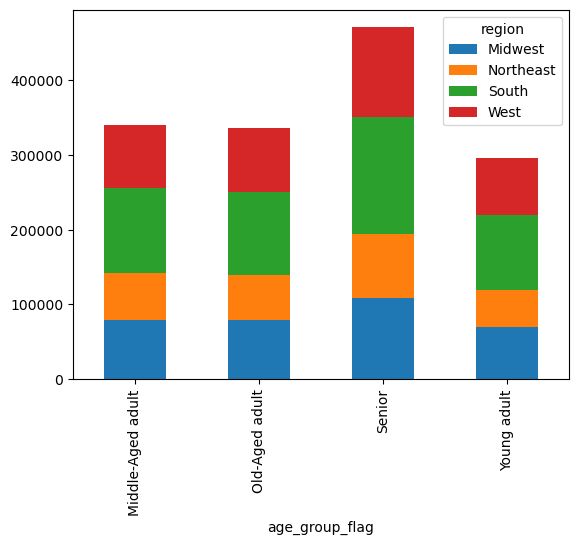

In [66]:
# Age_region Bar Chart
age_reg_bar_chart = age_reg.plot(kind='bar', stacked =True)

In [67]:
# Export to clipboard
age_reg_bar_chart.to_clipboard()

In [71]:
# Export Bar Chart
age_reg_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_reg_bar_chart.png'))

In [72]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [74]:
# Export to clipboard
df_dep.to_clipboard()

### Income

In [75]:
# creating crosstab for income and region
income_reg =pd.crosstab(df_opan['income_flag'], df_opan['region'])

In [76]:
# check
income_reg

region,Midwest,Northeast,South,West
income_flag,,,,
High Income,237,231,229,237
Low income,3169,2280,4490,3300
Low middle income,65098,47987,91603,69912
Middle income,127859,95934,182960,139038
Upper middle income,139740,111847,201866,153531


In [77]:
# Export to clipboard
income_reg.to_clipboard()

In [81]:
# creating crosstab for income and department
income_dep =pd.crosstab(df_opan['income_flag'], df_opan['department_id'])

In [82]:
# check
income_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_flag,,,,,,,,,,,,,,,,,,,,,
High Income,90,6,38,158,22,10,79,7,32,0,...,19,77,13,50,151,57,13,64,26,2
Low income,1029,12,468,3083,147,97,1315,42,380,8,...,124,752,367,492,1895,420,160,1796,424,30
Low middle income,21613,364,9554,67994,1978,2230,25736,840,7493,244,...,3819,16208,7008,9362,39070,8117,2000,36325,9107,828
Middle income,43037,698,19864,155070,3356,5145,42178,1814,17326,397,...,14204,35627,11977,21793,85079,14454,5615,40016,17867,1723
Upper middle income,47321,800,21837,173710,3566,5780,46917,1956,19260,473,...,15980,40010,13187,24287,95993,15760,5622,42943,19991,1794


In [83]:
# Export to clipboard
income_dep.to_clipboard()

### Pet status

In [87]:
# creating crosstab for pets status and region
pets_reg =pd.crosstab(df_opan['pets_flag'], df_opan['region'])

In [88]:
# check
pets_reg

region,Midwest,Northeast,South,West
pets_flag,,,,
Has Pets,17037,14266,24113,21430
No Pets,319066,244013,457035,344588


In [89]:
# Export to clipboard
pets_reg.to_clipboard()

### Child age

In [90]:
# creating crosstab for child age and region
child_age_reg =pd.crosstab(df_opan['child_age_flag'], df_opan['region'])

In [91]:
# check
child_age_reg

region,Midwest,Northeast,South,West
child_age_flag,,,,
No children,82470,63873,119823,91999
Older children,251072,192472,358247,271348
Young children,2561,1934,3078,2671


In [92]:
# Export to clipboard
child_age_reg.to_clipboard()

### Pet status

In [93]:
# creating crosstab for pets status and region
pets_reg =pd.crosstab(df_opan['pets_flag'], df_opan['region'])

In [94]:
# check
pets_reg

region,Midwest,Northeast,South,West
pets_flag,,,,
Has Pets,17037,14266,24113,21430
No Pets,319066,244013,457035,344588


In [95]:
# Export to clipboard
pets_reg.to_clipboard()

9. Produce suitable charts to illustrate your results and export them in your project folder.

In [96]:
# variables overview
df_opan.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_since_prior_order', 'order_frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'region',
       'activity', 'age_group_flag', 'income_flag', 'household_size_flag',
       'child_age_flag', 'pets_flag', 'dept_name'],
      dtype='object')

#### Spending Flag & Age Groups

In [97]:
# creating crosstab for spending flag and age group
age_spending = pd.crosstab(df_opan['age_group_flag'], df_opan['spending_flag'])

In [98]:
# check age_spending
age_spending

spending_flag,High Spender,Low Spender
age_group_flag,,
Middle-Aged adult,7314,332097
Old-Aged adult,7938,328152
Senior,9160,461500
Young adult,6465,288922


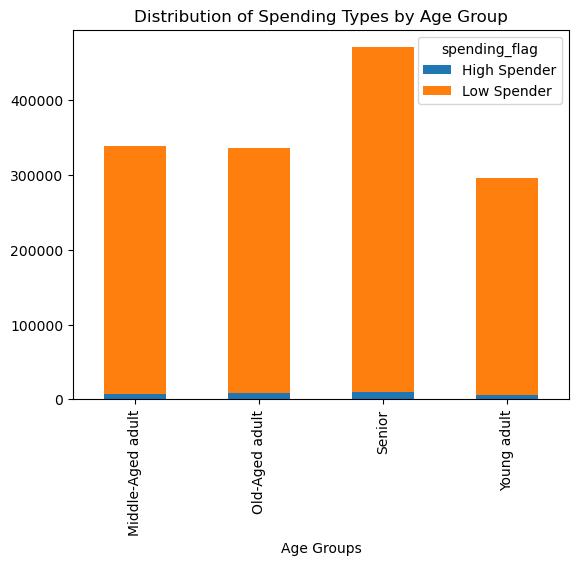

In [99]:
# create bar chart for spending flag and age group
bar_age_spending = age_spending.plot(kind= 'bar', stacked = True)
plt.title('Distribution of Spending Types by Age Group')
plt.xlabel('Age Groups')
plt.savefig('bar_age_spending.png', bbox_inches='tight')

In [100]:
# Export Bar Chart

bar_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_spending.png'))

#### Region and Income Type

In [101]:
# create crosstab region and income
income_reg2 =pd.crosstab(df_opan['region'], df_opan['income_flag'])

In [102]:
income_reg2

income_flag,High Income,Low income,Low middle income,Middle income,Upper middle income
region,,,,,
Midwest,237,3169,65098,127859,139740
Northeast,231,2280,47987,95934,111847
South,229,4490,91603,182960,201866
West,237,3300,69912,139038,153531


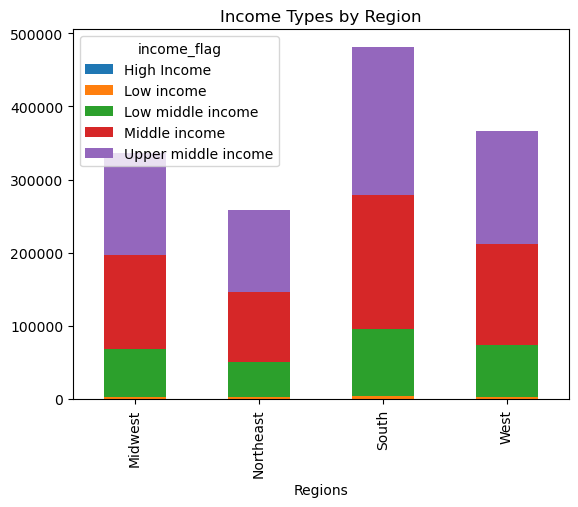

In [103]:
# create bar chart for region and income
bar_income_region = income_reg2.plot(kind= 'bar', stacked = True)
plt.title('Income Types by Region')
plt.xlabel('Regions')
plt.savefig('bar_income_region.png', bbox_inches='tight')

In [104]:
# Export Bar Chart

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

In [105]:
# Creating crosstab for income and frequency

income_freq = pd.crosstab(df_opan['income_flag'], df_opan['order_frequency_flag'], dropna = False)

In [106]:
# Checking crosstab

income_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_flag,,,
High Income,297,507,130
Low income,3507,6810,2922
Low middle income,67781,143080,63739
Middle income,132853,281530,131408
Upper middle income,151063,310299,145622


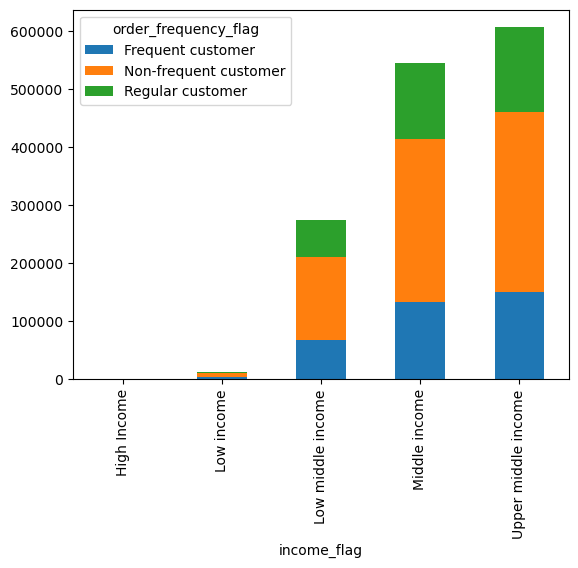

In [107]:
# Income Group and Order frequency Bar Chart

group_and_rder_frequency_bar = income_freq.plot(kind='bar', stacked =True)

In [108]:
# Export Bar Chart

group_and_rder_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'group_and_rder_frequency_bar.png'))